<a href="https://colab.research.google.com/github/AdrianDiazGaxiola/Proyecto-Final/blob/main/Sequ%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Este programa se empleará para limpiar el DataFrame con los datos de las sequías en México

In [1]:
!pip install numpy
!pip install pandas
!pip install openpyxl

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler

Se copia el archivo de github con los datos a un dataframe

In [2]:
url = "https://raw.githubusercontent.com/AdrianDiazGaxiola/Proyecto-Final/main/Data/Sequ%C3%ADas.csv"
Seq = pd.read_csv(url, encoding='ISO-8859-1')

print(Seq)

      Clave del Municipio  ... Total (D0 a D4)
0                  1001.0  ...            65.0
1                  1002.0  ...            64.0
2                  1003.0  ...            71.0
3                  1004.0  ...            61.0
4                  1005.0  ...            66.0
...                   ...  ...             ...
2460              32056.0  ...            75.0
2461              32057.0  ...            73.0
2462              32058.0  ...           121.0
2463                  NaN  ...             NaN
2464                  NaN  ...             NaN

[2465 rows x 307 columns]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (92,93,131,132,301) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Seq.head()

,Clave del Municipio,Nombre del Municipio,Entidad,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,...,2019-08-31,2019-09-15,2019-09-30,2019-10-15,2019-10-31,2019-11-15,2019-11-30,2019-12-15,2019-12-31,2020-01-15,2020-01-31,2020-02-15,2020-02-29,2020-03-15,2020-03-31,2020-04-15,2020-04-30,2020-05-15,2020-05-31,2020-06-15,2020-06-30,2020-07-15,2020-07-31,2020-08-15,2020-08-31,2020-09-15,2020-09-30,2020-10-15,2020-10-31,2020-11-15,2020-11-30,2020-12-15,2020-12-31,Unnamed: 300,Anormalmente Seco (D0),Sequía Moderada (D1),Sequía Severa (D2),Sequía Extrema (D3),Sequía Excepcional (D4),Total (D0 a D4)
0,1001.0,Aguascalientes,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Severa,...,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,Sequía Moderada,NaN,33,22.0,4.0,5.0,1.0,65.0
1,1002.0,Asientos,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,...,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,Sequía Moderada,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,Sequía Moderada,NaN,33,19.0,8.0,4.0,0.0,64.0
2,1003.0,Calvillo,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Severa,...,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,NaN,NaN,Anormalmente Seco,NaN,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,NaN,38,20.0,7.0,4.0,2.0,71.0
3,1004.0,Cosío,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,...,Sequía Moderada,Sequía Moderada,Sequía Moderada,Sequía Moderada,Sequía Moderada,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,NaN,26,23.0,9.0,3.0,0.0,61.0
4,1005.0,Jesús María,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Severa,...,Anormalmente Seco,Anormalmente Seco,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,NaN,NaN,NaN,NaN,NaN,NaN,Anormalmente Seco,Anormalmente Seco,Sequía Moderada,Sequía Moderada,Sequía Moderada,NaN,33,21.0,6.0,4.0,2.0,66.0


Se eliminan las columnas que no se utilizarán

In [56]:
df = Seq

df = df.drop(columns={"Clave del Municipio", "Nombre del Municipio", "Anormalmente Seco (D0)", "Sequía Moderada (D1)", "Sequía Severa (D2)", "Sequía Extrema (D3)", "Sequía Excepcional (D4)", "Total (D0 a D4)",  })

#Se elimina la columna vacía
df = df.drop(Seq.columns[299],axis=1)

Se renombran las clasificaciones de las sequías y se abrevian algunos estados 

In [57]:
#Se abrevian las clasificaciones de las sequías
df = df.replace(to_replace ="Anormalmente Seco",
                 value ="D0")
df = df.replace(to_replace ="Sequía Moderada",
                 value ="D1")
df = df.replace(to_replace ="Sequía Severa",
                 value ="D2")
df = df.replace(to_replace ="Sequía Extrema",
                 value ="D3")
df = df.replace(to_replace ="Sequía Excepcional",
                 value ="D4")

#Se abrevian los nombres de los estados
df = df.replace(to_replace = "Veracruz de Ignacio de la Llave",
                value = "Veracruz")
df = df.replace(to_replace = "Michoacán de Ocampo",
                value = "Michoacán")
df = df.replace(to_replace = "Coahuila de Zaragoza",
                value = "Coahuila")
df = df.replace(to_replace = "Querétaro de Arteaga",
                value = "Querétaro")


In [59]:
#Se reacomoda el dataframe, a modo de tener en una columna las fechas de las tormentas
df1 = (df.set_index(["Entidad"])
         .stack()
         .reset_index(name='Sequía')
         .rename(columns={'level_1':'Fecha'}))

#Se convierte a tipo fecha los valores en la columna de las fechas
df1['Fecha'] = pd.to_datetime(df1['Fecha'], errors='coerce')

#Se crea una nueva columna para tener por separado día, mes y año
df1['Día'] = df1['Fecha'].dt.day
df1['Mes'] = df1['Fecha'].dt.month
df1['Anio'] = df1['Fecha'].dt.year

#Se ordena el dataframe por fechas
df1 = df1.sort_values(by='Fecha')

df1 = df1.drop(columns={'Fecha', 'Día'})

df1 = df1.reset_index(drop = True)

print (df1.head(30))

             Entidad Sequía  Mes  Anio
0           Guerrero     D2    1  2003
1             Oaxaca     D1    1  2003
2             Oaxaca     D0    1  2003
3   Ciudad de México     D0    1  2003
4             Oaxaca     D0    1  2003
5             Oaxaca     D1    1  2003
6            Tabasco     D1    1  2003
7             Oaxaca     D1    1  2003
8            Durango     D0    1  2003
9           Veracruz     D0    1  2003
10            Oaxaca     D1    1  2003
11        Tamaulipas     D0    1  2003
12            Oaxaca     D1    1  2003
13        Tamaulipas     D0    1  2003
14            Oaxaca     D3    1  2003
15           Durango     D1    1  2003
16        Tamaulipas     D0    1  2003
17            Oaxaca     D3    1  2003
18        Tamaulipas     D1    1  2003
19           Durango     D0    1  2003
20            Oaxaca     D2    1  2003
21        Tamaulipas     D0    1  2003
22        Tamaulipas     D0    1  2003
23            Oaxaca     D0    1  2003
24            Oaxaca     

Se grafican las distribuciones de sequías por entidad de acuerdo a la categoría

Text(0.5, 1.0, 'Distribución del total de sequías por entidad 2003-2020')

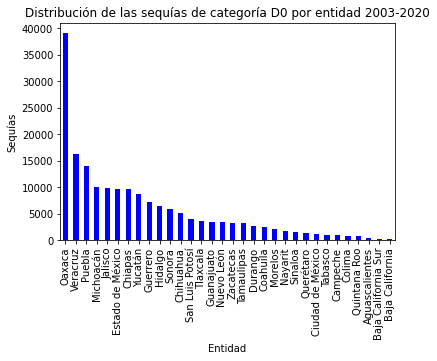

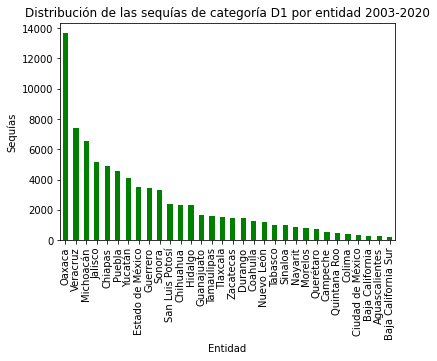

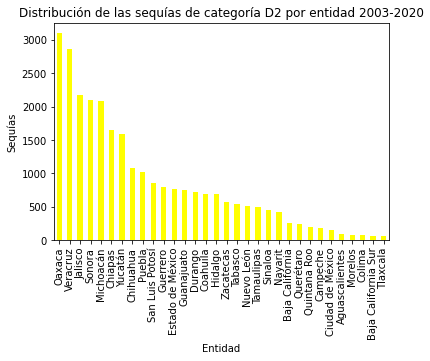

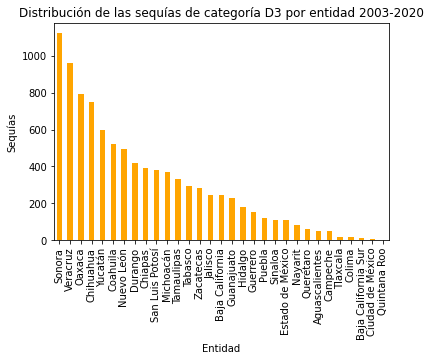

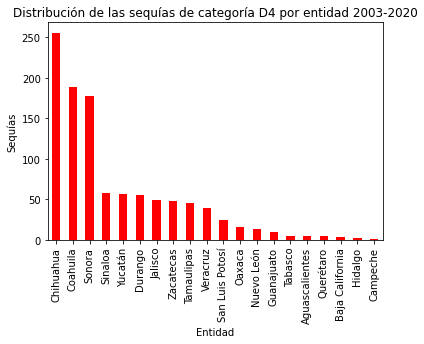

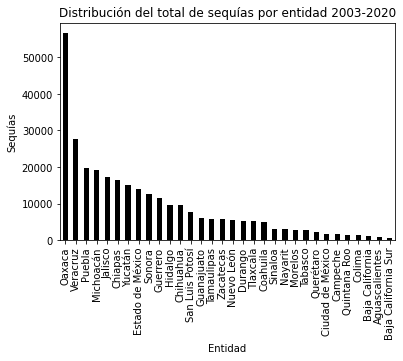

In [71]:
df = df1[df1['Sequía']=='D0']
bins = np.arange(2003, 2021, 4)

df['Entidad'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución de las sequías de categoría D0 por entidad 2003-2020')

plt.figure()
df = df1[df1['Sequía']=='D1']
df['Entidad'].value_counts().plot(kind = 'bar', color = 'green')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución de las sequías de categoría D1 por entidad 2003-2020')

plt.figure()
df = df1[df1['Sequía']=='D2']
df['Entidad'].value_counts().plot(kind = 'bar', color = 'yellow')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución de las sequías de categoría D2 por entidad 2003-2020')

plt.figure()
df = df1[df1['Sequía']=='D3']
df['Entidad'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución de las sequías de categoría D3 por entidad 2003-2020')

plt.figure()
df = df1[df1['Sequía']=='D4']
df['Entidad'].value_counts().plot(kind = 'bar', color = 'red')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución de las sequías de categoría D4 por entidad 2003-2020')

plt.figure()
df1['Entidad'].value_counts().plot(kind = 'bar', color = 'black')
plt.xlabel('Entidad')
plt.ylabel('Sequías')
plt.title('Distribución del total de sequías por entidad 2003-2020')

Se ordenan las filas de acuerdo a entidad, año, mes, y número de tormentas de acuerdo a su clasificación

In [7]:
anios = range(2003, 2021)
estados_comp = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de Mexico', 'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']

meses = list(range(1, 13))

df3 = pd.DataFrame(columns={"Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total Sequías"})

l = 0
for i in anios:
  for j in meses:
    for k in estados_comp:
      df2 = df1[(df1['Entidad']==k) & (df1['Anio']==i) & (df1['Mes']==j)]

      df3.at[l, "Entidad"] = k
      df3.at[l, "Anio"] = i
      df3.at[l, "Mes"] = j

      #Se copia la cantidad de tormentas por clasificación que aparecen en la entidad, mes y año correspondientes
      df3.at[l, "D0"] = (df2.Sequía=='D0').sum().sum()
      df3.at[l, "D1"] = (df2.Sequía=='D1').sum().sum()
      df3.at[l, "D2"] = (df2.Sequía=='D2').sum().sum()
      df3.at[l, "D3"] = (df2.Sequía=='D3').sum().sum()
      df3.at[l, "D4"] = (df2.Sequía=='D4').sum().sum()

      #Se agrega un total de sequías, corespondiente a la suma de los cuatro tipos de sequías
      df3.at[l, "Total Sequías"] = df3.at[l, "D0"] + df3.at[l, "D1"] + df3.at[l, "D2"] + df3.at[l, "D3"] + df3.at[l, "D4"]

      l += 1

#Se reordenan las columnas del dataframe
df3 = df3[["Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total Sequías"]]

print(df3)

                  Entidad  Anio Mes   D0  D1 D2 D3 D4 Total Sequías
0          Aguascalientes  2003   1    0   0  0  0  0             0
1         Baja California  2003   1    2   1  1  1  0             5
2     Baja California Sur  2003   1    1   0  1  0  0             2
3                Campeche  2003   1    6   0  0  0  0             6
4                Coahuila  2003   1    7   3  5  0  0            15
...                   ...   ...  ..  ...  .. .. .. ..           ...
6907           Tamaulipas  2020  12    9  27  3  3  0            42
6908             Tlaxcala  2020  12   28   0  0  0  0            28
6909             Veracruz  2020  12  130  24  0  0  0           154
6910              Yucatan  2020  12    0   0  0  0  0             0
6911            Zacatecas  2020  12   16  37  5  0  0            58

[6912 rows x 9 columns]


Dataframe con las sequías a nivel nacional y por mes

In [12]:
anios = list(range(2003, 2021))

df4 = pd.DataFrame(columns={"Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total_Sequías"})

j = 0
for i in anios:
  for k in meses:
    df = df3[(df3["Anio"]==i) & (df3['Mes']==k)]

    df4.at[j, "Entidad"] = "NAC"
    df4.at[j, "Anio"] = i
    df4.at[j, "Mes"] = k
    df4.at[j, "D0"] = (df.D0).sum().sum()
    df4.at[j, "D1"] = (df.D1).sum().sum()
    df4.at[j, "D2"] = (df.D2).sum().sum()
    df4.at[j, "D3"] = (df.D3).sum().sum()
    df4.at[j, "D4"] = (df.D4).sum().sum()
    df4.at[j, "Total_Sequías"] = (df["Total Sequías"]).sum().sum()

    j += 1

df4 = df4[["Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total_Sequías"]]
print(df4)

    Entidad  Anio Mes    D0   D1   D2   D3  D4 Total_Sequías
0       NAC  2003   1   648  335  149   61   4          1197
1       NAC  2003   2   696  339  145   58   4          1242
2       NAC  2003   3   637  347  147   57   4          1192
3       NAC  2003   4   682  374  142   59   4          1261
4       NAC  2003   5   682  374  142   59   4          1261
..      ...   ...  ..   ...  ...  ...  ...  ..           ...
211     NAC  2020   8  1437  660  311   69   0          2477
212     NAC  2020   9  1206  709  297   59   0          2271
213     NAC  2020  10  1050  783  339   92   0          2264
214     NAC  2020  11   920  702  440  112  12          2186
215     NAC  2020  12   483  374  207   84  12          1160

[216 rows x 9 columns]


Se crea un nuevo dataframe que solo contiene los datos a nivel nacional y por año

In [29]:
anios = list(range(2003, 2021))

df4 = pd.DataFrame(columns={"Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total_Sequías"})

j = 0
for i in anios:
  df = df3[df3["Anio"]==i]

  df4.at[j, "Entidad"] = "NAC"
  df4.at[j, "Anio"] = i
  df4.at[j, "Mes"] = "ANUAL"
  df4.at[j, "D0"] = (df.D0).sum().sum()
  df4.at[j, "D1"] = (df.D1).sum().sum()
  df4.at[j, "D2"] = (df.D2).sum().sum()
  df4.at[j, "D3"] = (df.D3).sum().sum()
  df4.at[j, "D4"] = (df.D4).sum().sum()
  df4.at[j, "Total_Sequías"] = (df["Total Sequías"]).sum().sum()

  j += 1

df4 = df4[["Entidad", "Anio", "Mes", "D0", "D1", "D2", "D3", "D4", "Total_Sequías"]]
print(df4)

   Entidad  Anio    Mes     D0    D1    D2    D3   D4 Total_Sequías
0      NAC  2003  ANUAL   6131  2625  1026   448   30         10260
1      NAC  2004  ANUAL   4358  1243    48    19    5          5673
2      NAC  2005  ANUAL   6096  1954    89     1    0          8140
3      NAC  2006  ANUAL   6218  2941  1401   486  214         11260
4      NAC  2007  ANUAL   4427  2725   910   201    4          8267
5      NAC  2008  ANUAL   6217  3209   971   199    9         10605
6      NAC  2009  ANUAL   6296  4697   953   132    8         12086
7      NAC  2010  ANUAL   2365   888   864   312    0          4429
8      NAC  2011  ANUAL   4195  3376  2805  1987  500         12863
9      NAC  2012  ANUAL   2032  1434   760   462   82          4770
10     NAC  2013  ANUAL   4150   765   157    61   19          5152
11     NAC  2014  ANUAL   7809  1297   275    54    0          9435
12     NAC  2015  ANUAL   9266  2646   392    64    0         12368
13     NAC  2016  ANUAL  12287  6239  1556   304

Se lee el archivo que contiene los datos de las temperaturas y nivel de precipitación

In [9]:
url = "https://github.com/AdrianDiazGaxiola/Proyecto-Final/blob/main/Data/DataFrames%20Combinados/Temperaturas+Precipitaci%C3%B3n.csv?raw=true"
df_completo = pd.read_csv(url)

Se crea un dataframe con la temperatura media anual nacional y el total de sequías

In [53]:
df = df_completo[(df_completo["ANIO"]>=2003) & (df_completo["ENTIDAD"]=="NAC") & (df_completo["MES"]=="ANUAL")]

df = df[['ANIO', 'MES', 'T_Med',]]

totalseq = df4.Total_Sequías.to_list()

df['Total_Sequías'] = totalseq

print(df)

       ANIO    MES      T_Med  Total_Sequías
8150   2003  ANUAL  20.955060          10260
8579   2004  ANUAL  20.867124           5673
9008   2005  ANUAL  21.391637           8140
9437   2006  ANUAL  21.911281          11260
9866   2007  ANUAL  21.776355           8267
10295  2008  ANUAL  21.366667          10605
10724  2009  ANUAL  21.779167          12086
11153  2010  ANUAL  21.000000           4429
11582  2011  ANUAL  21.820833          12863
12011  2012  ANUAL  21.866667           4770
12440  2013  ANUAL  21.925000           5152
12869  2014  ANUAL  22.075000           9435
13298  2015  ANUAL  22.100000          12368
13727  2016  ANUAL  22.433333          20386
14156  2017  ANUAL  22.550000          20478
14585  2018  ANUAL  22.208333          23048
15014  2019  ANUAL  22.400000          29433
15443  2020  ANUAL  22.400000          24101


Se busca la correlación entre la temperatura media nacional y el total de sequías

                  T_Med  Total_Sequías
T_Med          1.000000       0.717422
Total_Sequías  0.717422       1.000000


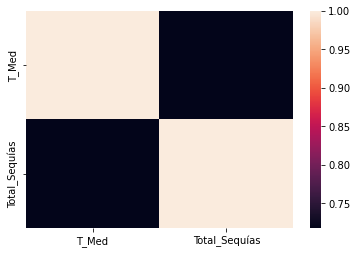

In [54]:
df1 = df[['T_Med', 'Total_Sequías']] 

c = df1.corr()

print (c)

sns.heatmap(c)

Se crea un modelo de regresión lineal entre la temperatura media nacional y la cantidad de sequías totales

Text(0.5, 1.0, 'Precipitación vs. Sequías a nivel Nacional')

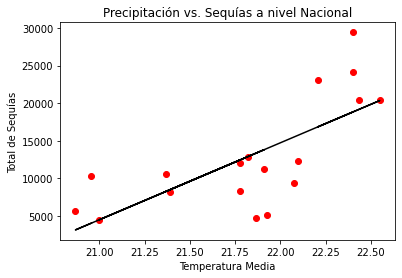

In [44]:
X = df1[['T_Med']]
y = df1['Total_Sequías']
regressor = LinearRegression()
regressor.fit(X, y)

plt.plot(X, y, 'ro')
plt.plot(X, regressor.predict(X), '-k')
plt.xlabel('Temperatura Media')
plt.ylabel('Total de Sequías')
plt.title('Precipitación vs. Sequías a nivel Nacional')

Modelo de regresión con el dataframe normalizado

Text(0.5, 1.0, 'Precipitación vs. Sequías a nivel Nacional')

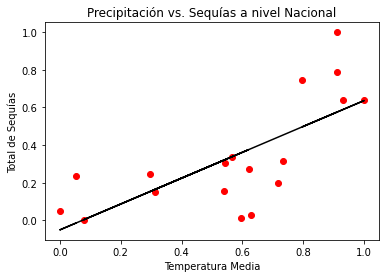

In [43]:
scaler = MinMaxScaler()
df2 = df1[['T_Med', 'Total_Sequías']]

normalized_df=(df2-df2.min())/(df2.max()-df2.min())

X = normalized_df[['T_Med']]
y = normalized_df['Total_Sequías']
regressor = LinearRegression()
regressor.fit(X, y)

plt.plot(X, y, 'ro')
plt.plot(X, regressor.predict(X), '-k')
plt.xlabel('Temperatura Media')
plt.ylabel('Total de Sequías')
plt.title('Precipitación vs. Sequías a nivel Nacional')

Se combina el dataframe que incluye las temperaturas y nivel de precipitación, tomando solamente los datos por año y a nivel nacional 

In [ ]:
df = df_completo[(df_completo["ANIO"]>=2003) & (df_completo["ENTIDAD"]=="NAC") & (df_completo["MES"]=="ANUAL")]

d0 = df4["D0"].tolist()
d1 = df4["D1"].tolist()
d2 = df4["D2"].tolist()
d3 = df4["D3"].tolist()
d4 = df4["D4"].tolist()
total = df4["Total_Sequías"].tolist()

df["D0"] = d0
df["D1"] = d1
df["D2"] = d2
df["D3"] = d3
df["D4"] = d4
df["Total_Sequías"] = total

df = df.reset_index(drop=True)
print(df.head(5))


Se descarga el nuevo dataframe con los datos adjuntos

In [ ]:
df.to_csv("Temp+Prec+Seq.csv", encoding='utf-8', index=False)
from google.colab import files
files.download("Temp+Prec+Seq.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
seq_por_entidad = {}

anios = range(2003, 2021)
estados_comp = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua', 'Ciudad de Mexico', 'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de Mexico', 'Michoacan', 'Morelos', 'Nayarit', 'Nuevo Leon', 'Oaxaca', 'Puebla', 'Queretaro', 'Quintana Roo', 'San Luis Potosi', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']

#Ciclo con una iteración por estado de la república
for i in range (32):
  #Se guarda en un dataframe aparte los datos del estado en el que nos encontramos
  df1 = Seq[Seq['Entidad']==estados_comp[i]]

  #Se establecen las columnas del nuevo dataframe que contendrá los datos del estado en el que nos ubicamos, incluyendo año y la cantidad de sequías por clasificación de cada año.
  df2 = pd.DataFrame(columns=['ANIO', 'Anormalmente Seco', 'Sequia Moderada', 'Sequia Severa', 'Sequia Extrema', 'Sequia Excepcional', 'Total'])

  for j in range (2003,2021):
    l = j - 2002

    #Se guarda el número del año en la fila en que nos encontramos, debajo de la columna 'ANIO'
    df2.at[l, 'ANIO'] = anios[l-1]

    #Se suma independientemente la cantidad de sequías de acuerdo a su clasificación en el año en que nos encontramos, utilizando la función df.filter ya que tenemos varias columnas cuyos nombres (los años) se repiten.
    df2.at[l, 'Anormalmente Seco'] = (df1.filter(like = str(j))=='D0').sum().sum()
    df2.at[l, 'Sequia Moderada'] = (df1.filter(like = str(j))=='D1').sum().sum()
    df2.at[l, 'Sequia Severa'] = (df1.filter(like = str(j))=='D2').sum().sum()
    df2.at[l, 'Sequia Extrema'] = (df1.filter(like = str(j))=='D3').sum().sum()
    df2.at[l, 'Sequia Excepcional'] = (df1.filter(like = str(j))=='D4').sum().sum()

    #Se obtiene el valor de la columna 'Total' sumando los valores obtenidos en el paso anterior
    df2.at[l, 'Total'] = df2.at[l, 'Anormalmente Seco'] + df2.at[l, 'Sequia Moderada'] + df2.at[l, 'Sequia Severa'] + df2.at[l, 'Sequia Extrema'] + df2.at[l, 'Sequia Excepcional'] 

  print(estados_comp[i])
  print(df2)        

#Se crea un dataframe con los datos de las sequías por año a nivel NACIONAL
df3 = pd.DataFrame(columns=['ANIO', 'Anormalmente Seco', 'Sequia Moderada', 'Sequia Severa', 'Sequia Extrema', 'Sequia Excepcional', 'Total'])
for i in range (2003, 2021):
  j = i - 2002

  df3.at[j, 'ANIO'] = anios[j-1]

  df3.at[j, 'Anormalmente Seco'] = (Seq.filter(like = str(i))=='D0').sum().sum()
  df3.at[j, 'Sequia Moderada'] = (Seq.filter(like = str(i))=='D1').sum().sum()
  df3.at[j, 'Sequia Severa'] = (Seq.filter(like = str(i))=='D2').sum().sum()
  df3.at[j, 'Sequia Extrema'] = (Seq.filter(like = str(i))=='D3').sum().sum()
  df3.at[j, 'Sequia Excepcional'] = (Seq.filter(like = str(i))=='D4').sum().sum()
  df3.at[j, 'Total'] = df3.at[j, 'Anormalmente Seco'] + df3.at[j, 'Sequia Moderada'] + df3.at[j, 'Sequia Severa'] + df3.at[j, 'Sequia Extrema'] + df3.at[j, 'Sequia Excepcional']

print ("NACIONAL")
print (df3)
